# Movies Analyis Project

## Introduction




This project analyzes IMDB(Internet Movie Database) database and a Movie Budgets Dataset to identify what types of films perform best. 

The goal  is to provide data-driven insights  on `movie genres`, `production budgets` and `release timing`that will guide the launch of a new movie studio for our company.


## Objectives of the Project



1. Clean and prepare the movie datasets
2. Explore and visualize movie trends
3. Recommend profitable genres and strategies for the new studio


## Business Understanding

The company’s management wants to enter the movie production industry but lacks experience in identifying what types of films are most likely to succeed.

This analysis aims to support management by answering the following key business questions:

  1. Which movie genres are the most profitable and well-received by audiences?

  2. Which genres perform well despite lower production budgets?

  3. Does the timing of a movie’s release impact its box office performance?





## Data Understanding

The analysis uses 2 datasets (IMDB Database and Movie Budgets dataset)that provide complementary information about movies:

`The IMDB Database` contains:
 - Movie Basics Table: Contains movie titles, genres, and release dates.

 - Movie Ratings Table: Includes average audience ratings and number of votes for each movie.

`The Movie Budgets Dataset`:
 Provides production budgets and the revenue figures.

These datasets  will be merged to create a unified view of each movie’s genre, financial performance, audience reception, and release timing.

## Loading the data into dataframes

In [2]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import sqlite3

#### Movie Budgets Dataset

In [3]:
#Creating a movie budgets dataframe
movie_budgets = pd.read_csv("./original_data/tn.movie_budgets.csv.gz")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### The IMDB Dataset

In [6]:
import zipfile
import pandas as pd

# unzip the database
with zipfile.ZipFile('original_data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall()

# connect to the SQLite database
conn = sqlite3.connect('im.db')


In [50]:
query = """
SELECT
    mb.movie_id,
    mb.primary_title,
    mb.genres,
    mb.start_year,
    mb.runtime_minutes,
    mr.averagerating,
    mr.numvotes
FROM movie_basics AS mb
JOIN movie_ratings AS mr
    ON mb.movie_id = mr.movie_id
WHERE mb.start_year IS NOT NULL
  AND mb.genres IS NOT NULL;
"""
movie_database = pd.read_sql_query(query, conn)

#Close the connection
#conn.close()

#Display first few rows of the movies_database dataframe
movie_database.head()



,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",2019,114.0,7.2,43
2,tt0069049,The Other Side of the Wind,Drama,2018,122.0,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",2018,NaN,6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.0,6.5,119


### Cleaning Movie Budget Dataset

In [ ]:
#check movie budget structure
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
#check for null values
# no null values are in the movie_budget dataset and all columns have data
movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [ ]:
#check if there is any duplicate
#no duplicates in movie_budget dataset
movie_budgets.duplicated().sum()

0

In [52]:
#change production_budget,domestic_gross and worldwide_gross to float
movie_budgets.head()
#this columns are to be converted in floats
movie_budgets['production_budget']=movie_budgets['production_budget'].str.replace(',','').str.replace('$','').astype(float)
movie_budgets['domestic_gross']=movie_budgets['domestic_gross'].str.replace(',','').str.replace('$','').astype(float)
movie_budgets['worldwide_gross']=movie_budgets['worldwide_gross'].str.replace(',','').str.replace('$','').astype(float)

<ipython-input-52-e24b2fc9078c>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['production_budget']=movie_budgets['production_budget'].str.replace(',','').str.replace('$','').astype(float)
<ipython-input-52-e24b2fc9078c>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['domestic_gross']=movie_budgets['domestic_gross'].str.replace(',','').str.replace('$','').astype(float)
<ipython-input-52-e24b2fc9078c>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['worldwide_gross']=movie_bu

In [68]:
#change release_date to date
movie_budgets['release_date']=pd.to_datetime(movie_budgets['release_date'],dayfirst=True)
movie_budgets['release_date']=movie_budgets['release_date'].dt.strftime('%d-%m-%Y')

In [ ]:
#rename column movie column to movie_title and drop id column
movie_budgets.rename(columns={'movie':'movie_title'},inplace=True)
movie_budgets.drop(columns='id',inplace=True)
movie_budgets.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,18-12-2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,20-05-2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,07-06-2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,01-05-2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,15-12-2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### Cleaning Movie Database

In [ ]:
#drop null values and confirm the null values don't exist
movie_database=movie_database.dropna()
movie_database.isnull().sum()

movie_id           0
primary_title      0
genres             0
start_year         0
runtime_minutes    0
averagerating      0
numvotes           0
dtype: int64

In [ ]:
movie_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73051
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   genres           65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


In [ ]:
#rename primary_title to movie_tile and drop the movie_id column
movie_database.rename(columns={'primary_title':'movie_title'},inplace=True)
movie_database.drop(columns='movie_id',inplace=True)

### Merging DataFrames
Combine the two dataframes into a single dataframe to enable analysis

In [ ]:
# merge movie_budgets and movie_database
merged_movies=pd.merge(movie_budgets,movie_database,on=['movie_title'],how='inner')

In [91]:
merged_movies.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,genres,start_year,runtime_minutes,averagerating,numvotes
0,18-12-2009,Avatar,425000000.0,760507625.0,2.776345e+09,Horror,2011,93.0,6.1,43
1,20-05-2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"Action,Adventure,Fantasy",2011,136.0,6.6,447624
2,07-06-2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"Action,Adventure,Sci-Fi",2019,113.0,6.0,24451
3,01-05-2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"Action,Adventure,Sci-Fi",2015,141.0,7.3,665594
4,27-04-2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"Action,Adventure,Sci-Fi",2018,149.0,8.5,670926


### New Feature
Generate a new feature called revenue that measures profit of each movie.This will show how each film profite based on the **production_budget** and **worldwide_gross**

In [98]:
#create profit column
merged_movies['Revenue'] = merged_movies['worldwide_gross']-merged_movies['production_budget']

In [100]:
#reorder the columns
merged_movies[['movie_title','genres','production_budget','worldwide_gross','Revenue','domestic_gross','start_year',
                'release_date','runtime_minutes','averagerating','numvotes']]

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes
0,Avatar,Horror,425000000.0,2.776345e+09,2.351345e+09,760507625.0,2011,18-12-2009,93.0,6.1,43
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000.0,1.045664e+09,6.350639e+08,241063875.0,2011,20-05-2011,136.0,6.6,447624
2,Dark Phoenix,"Action,Adventure,Sci-Fi",350000000.0,1.497624e+08,-2.002376e+08,42762350.0,2019,07-06-2019,113.0,6.0,24451
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000.0,1.403014e+09,1.072414e+09,459005868.0,2015,01-05-2015,141.0,7.3,665594
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,2.048134e+09,1.748134e+09,678815482.0,2018,27-04-2018,149.0,8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...
2747,Stories of Our Lives,Drama,15000.0,0.000000e+00,-1.500000e+04,0.0,2014,31-12-2014,60.0,7.5,85
2748,Cure,Drama,10000.0,9.459600e+04,8.459600e+04,94596.0,2011,06-07-2001,93.0,4.9,11
2749,Newlyweds,"Comedy,Drama",9000.0,4.584000e+03,-4.416000e+03,4584.0,2011,13-01-2012,95.0,6.4,1436
2750,Red 11,"Horror,Sci-Fi,Thriller",7000.0,0.000000e+00,-7.000000e+03,0.0,2019,31-12-2018,77.0,5.6,43


In [101]:
merged_movies.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,genres,start_year,runtime_minutes,averagerating,numvotes,Revenue
0,18-12-2009,Avatar,425000000.0,760507625.0,2.776345e+09,Horror,2011,93.0,6.1,43,2.351345e+09
1,20-05-2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"Action,Adventure,Fantasy",2011,136.0,6.6,447624,6.350639e+08
2,07-06-2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"Action,Adventure,Sci-Fi",2019,113.0,6.0,24451,-2.002376e+08
3,01-05-2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"Action,Adventure,Sci-Fi",2015,141.0,7.3,665594,1.072414e+09
4,27-04-2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"Action,Adventure,Sci-Fi",2018,149.0,8.5,670926,1.748134e+09


In [102]:
#save the clean data into a csv file
merged_movies.to_csv('merged_movies.csv',index=False)

# Q3 Does the date of release affect the popularity of a movie?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('merged_movies.csv')

# Clean up the truncated last row
df = df[~df['movie_title'].isna()]
df = df[df['movie_title'] != 'The Face']

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%d-%m-%Y', errors='coerce')

# Extract month and season from release date
df['release_month'] = df['release_date'].dt.month
df['release_quarter'] = df['release_date'].dt.quarter
df['release_year'] = df['release_date'].dt.year

# Create season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

df['release_season'] = df['release_month'].apply(get_season)

# Calculate ROI (Return on Investment)
df['roi'] = (df['Revenue'] / df['production_budget']) * 100

# Filter out extreme outliers for better visualization
df_clean = df[(df['production_budget'] > 0) & (df['Revenue'] > -1000000000) & (df['Revenue'] < 3000000000)]

print(f"Total movies analyzed: {len(df_clean)}")
print(f"Date range: {df_clean['release_date'].min()} to {df_clean['release_date'].max()}")

Total movies analyzed: 2752
Date range: 1915-02-08 00:00:00 to 2019-12-31 00:00:00


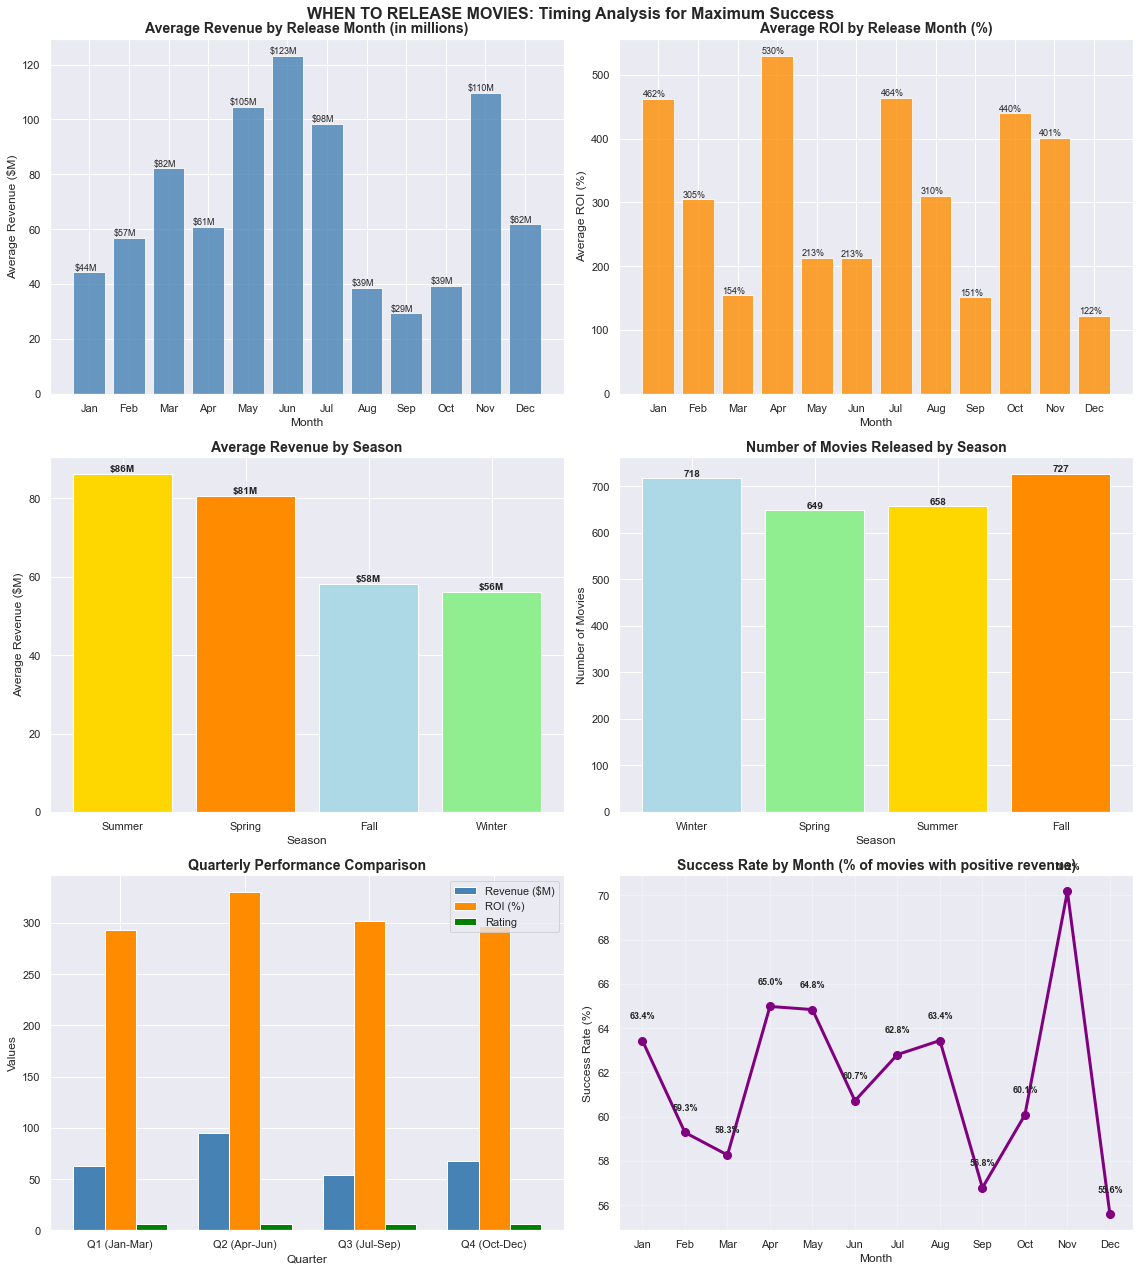

In [3]:
# Set style
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('WHEN TO RELEASE MOVIES: Timing Analysis for Maximum Success', fontsize=16, fontweight='bold')

# 1. MONTHLY PERFORMANCE - Average Revenue
monthly_performance = df_clean.groupby('release_month').agg({
    'Revenue': 'mean',
    'roi': 'mean',
    'averagerating': 'mean',
    'movie_title': 'count'
}).reset_index()
monthly_performance.columns = ['month', 'avg_revenue', 'avg_roi', 'avg_rating', 'movie_count']

# Sort by month
monthly_performance = monthly_performance.sort_values('month')

# Plot 1: Average Revenue by Month
axes[0, 0].bar(monthly_performance['month'], monthly_performance['avg_revenue']/1e6, 
               color='steelblue', alpha=0.8)
axes[0, 0].set_title('Average Revenue by Release Month (in millions)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Revenue ($M)')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for i, v in enumerate(monthly_performance['avg_revenue']/1e6):
    axes[0, 0].text(i+0.9, v, f'${v:,.0f}M', ha='center', va='bottom', fontsize=9)

# Plot 2: Average ROI by Month
axes[0, 1].bar(monthly_performance['month'], monthly_performance['avg_roi'], 
               color='darkorange', alpha=0.8)
axes[0, 1].set_title('Average ROI by Release Month (%)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average ROI (%)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for i, v in enumerate(monthly_performance['avg_roi']):
    axes[0, 1].text(i+0.9, v, f'{v:.0f}%', ha='center', va='bottom', fontsize=9)

# 2. SEASONAL PERFORMANCE
seasonal_performance = df_clean.groupby('release_season').agg({
    'Revenue': 'mean',
    'roi': 'mean',
    'averagerating': 'mean',
    'movie_title': 'count'
}).reset_index()
seasonal_performance = seasonal_performance.sort_values('Revenue', ascending=False)

# Plot 3: Average Revenue by Season
axes[1, 0].bar(seasonal_performance['release_season'], seasonal_performance['Revenue']/1e6, 
               color=['gold', 'darkorange', 'lightblue', 'lightgreen'])
axes[1, 0].set_title('Average Revenue by Season', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Average Revenue ($M)')
for i, v in enumerate(seasonal_performance['Revenue']/1e6):
    axes[1, 0].text(i, v, f'${v:,.0f}M', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Movie Count by Season
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_counts = df_clean['release_season'].value_counts().reindex(season_order)
colors = ['lightblue', 'lightgreen', 'gold', 'darkorange']
axes[1, 1].bar(season_counts.index, season_counts.values, color=colors)
axes[1, 1].set_title('Number of Movies Released by Season', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Number of Movies')
for i, v in enumerate(season_counts.values):
    axes[1, 1].text(i, v, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. QUARTERLY PERFORMANCE
quarterly_performance = df_clean.groupby('release_quarter').agg({
    'Revenue': 'mean',
    'roi': 'mean',
    'averagerating': 'mean',
    'movie_title': 'count'
}).reset_index()

# Plot 5: Quarterly Performance Comparison
quarters = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
x = np.arange(len(quarters))
width = 0.25

ax5 = axes[2, 0]
bars1 = ax5.bar(x - width, quarterly_performance['Revenue']/1e6, width, 
                label='Revenue ($M)', color='steelblue')
bars2 = ax5.bar(x, quarterly_performance['roi'], width, 
                label='ROI (%)', color='darkorange')
bars3 = ax5.bar(x + width, quarterly_performance['averagerating'], width, 
                label='Rating', color='green')

ax5.set_title('Quarterly Performance Comparison', fontsize=14, fontweight='bold')
ax5.set_xlabel('Quarter')
ax5.set_ylabel('Values')
ax5.set_xticks(x)
ax5.set_xticklabels(quarters)
ax5.legend()

# Plot 6: Success Rate by Month (Percentage of movies with positive revenue)
success_by_month = df_clean.groupby('release_month').apply(
    lambda x: (x['Revenue'] > 0).sum() / len(x) * 100
).reset_index()
success_by_month.columns = ['month', 'success_rate']

axes[2, 1].plot(success_by_month['month'], success_by_month['success_rate'], 
                marker='o', linewidth=3, color='purple', markersize=8)
axes[2, 1].set_title('Success Rate by Month (% of movies with positive revenue)', 
                     fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('Success Rate (%)')
axes[2, 1].set_xticks(range(1, 13))
axes[2, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[2, 1].grid(True, alpha=0.3)

# Add success rate labels
for i, (month, rate) in enumerate(zip(success_by_month['month'], success_by_month['success_rate'])):
    axes[2, 1].text(month, rate+1, f'{rate:.1f}%', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [29]:
# Find top performing months
top_months = monthly_performance.nlargest(3, 'avg_revenue')
worst_months = monthly_performance.nsmallest(3, 'avg_revenue')

# Find top performing seasons
top_seasons = seasonal_performance.nlargest(2, 'Revenue')
worst_seasons = seasonal_performance.nsmallest(2, 'Revenue')

print("WHEN SHOULD WE RELEASE? KEY FINDINGS:")

print(f"\n TOP 3 MONTHS FOR AVERAGE REVENUE:")
for idx, row in top_months.iterrows():
    month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][int(row['month'])-1]
    print(f"  • {month_name}: ${row['avg_revenue']/1e6:,.1f}M average revenue | {row['avg_roi']:.0f}% ROI")

print(f"\n WORST 3 MONTHS FOR AVERAGE REVENUE:")
for idx, row in worst_months.iterrows():
    month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][int(row['month'])-1]
    print(f"  • {month_name}: ${row['avg_revenue']/1e6:,.1f}M average revenue | {row['avg_roi']:.0f}% ROI")

print(f"\n BEST SEASONS FOR RELEASE:")
for idx, row in top_seasons.iterrows():
    print(f"  • {row['release_season']}: ${row['Revenue']/1e6:,.1f}M average revenue")

print(f"\n WORST SEASONS FOR RELEASE:")
for idx, row in worst_seasons.iterrows():
    print(f"  • {row['release_season']}: ${row['Revenue']/1e6:,.1f}M average revenue")

# Analyze success rate
print(f"\n SUCCESS RATE ANALYSIS:")
best_success_month = success_by_month.loc[success_by_month['success_rate'].idxmax()]
worst_success_month = success_by_month.loc[success_by_month['success_rate'].idxmin()]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(f"  • Highest success rate: {month_names[int(best_success_month['month'])-1]} ({best_success_month['success_rate']:.1f}% of movies profitable)")
print(f"  • Lowest success rate: {month_names[int(worst_success_month['month'])-1]} ({worst_success_month['success_rate']:.1f}% of movies profitable)")

# Analyze blockbuster timing
high_budget = df_clean[df_clean['production_budget'] > 100000000]  # > $100M budget
if len(high_budget) > 0:
    high_budget_timing = high_budget.groupby('release_month').agg({
        'Revenue': 'mean',
        'roi': 'mean',
        'movie_title': 'count'
    }).reset_index()
    
    if len(high_budget_timing) > 0:
        best_big_budget_month = high_budget_timing.loc[high_budget_timing['Revenue'].idxmax()]
        month_name = month_names[int(best_big_budget_month['release_month'])-1]
        print(f"\n HIGH-BUDGET MOVIES (>$100M):")
        print(f"  • Best month for big budgets: {month_name} (${best_big_budget_month['Revenue']/1e6:,.1f}M average revenue)")

WHEN SHOULD WE RELEASE? KEY FINDINGS:

 TOP 3 MONTHS FOR AVERAGE REVENUE:
  • Jun: $123.3M average revenue | 213% ROI
  • Nov: $109.7M average revenue | 401% ROI
  • May: $104.6M average revenue | 213% ROI

 WORST 3 MONTHS FOR AVERAGE REVENUE:
  • Sep: $29.4M average revenue | 151% ROI
  • Aug: $38.5M average revenue | 310% ROI
  • Oct: $39.4M average revenue | 440% ROI

 BEST SEASONS FOR RELEASE:
  • Summer: $86.2M average revenue
  • Spring: $80.7M average revenue

 WORST SEASONS FOR RELEASE:
  • Winter: $56.1M average revenue
  • Fall: $58.2M average revenue

 SUCCESS RATE ANALYSIS:
  • Highest success rate: Nov (70.2% of movies profitable)
  • Lowest success rate: Dec (55.6% of movies profitable)

 HIGH-BUDGET MOVIES (>$100M):
  • Best month for big budgets: Apr ($618.4M average revenue)


In [27]:
# Release Recommendations for the Head of Studio
print("\n")
print("OPTIMUM RELEASE WINDOWS FOR MAX PERFORMANCE")
print("\n")

print("\n1. MAXIMUM GROSS REVENUE")
print("   • PRIME WINDOW: May & June (Summer Peak)")
print("     - June leads with $123.3M average revenue per film.")
print("     - School is out and 'vacation spending' is at its annual peak.")
print("     - Reserve this for your highest-budget ($100M+) visual spectacles.")
print("     - Success here requires a massive marketing to beat competitors.")

print("\n2. HIGHEST PROFIT MARGINS (ROI)")
print("   • PRIME WINDOW: October & November")
print("    - October ROI hits 440%; November boasts a 70.2% success rate.")
print("    - October is fueled by low-budget Horror fans (Halloween).")
print("    - November captures the 'Family Thanksgiving' and 'Award Season' crowds.")
print("    - Launch mid-budget dramas in Nov and low-budget Horror in Oct.")
print("    - This maximizes profit with significantly less financial risk.")

print("\n3. HIGH-BUDGET OPPORTUNITY")
print("   • PRIME WINDOW: April")
print("    - Big-budget movies (>$100M) average $618.4M in revenue here.")
print("    - It's the 'Early Summer' slot. You capture the audience's hunger for")
print("      blockbusters before the June/July market becomes oversaturated.")
print("    - If you have a high-confidence 'Tentpole' film, release in April to")
print("      own the market before the 'Summer Wars' begin.")

print("\n4. RISK MITIGATION")
print("   • AVOID WINDOW: September & January")
print("    - September is the weakest month ($29.4M avg revenue).")
print("    - Sept. is 'Back-to-School' (no time); Jan. is 'Holiday Hangover' (no money).")
print("    - Do not launch original IP or high-priority films here. Use these")
print("      months only for experimental films or contractual 'dumping'.")

print("\n FINAL SUMMARY")
print("   - For GROSS:   Invest heavily in June/May.")
print("   - For PROFIT:  Go Targeted in October/November.")
print("   - For SAFETY:  Early release in April.")
print("\n")



OPTIMUM RELEASE WINDOWS FOR MAX PERFORMANCE



1. MAXIMUM GROSS REVENUE
   • PRIME WINDOW: May & June (Summer Peak)
     - June leads with $123.3M average revenue per film.
     - School is out and 'vacation spending' is at its annual peak.
     - Reserve this for your highest-budget ($100M+) visual spectacles.
     - Success here requires a massive marketing to beat competitors.

2. HIGHEST PROFIT MARGINS (ROI)
   • PRIME WINDOW: October & November
    - October ROI hits 440%; November boasts a 70.2% success rate.
    - October is fueled by low-budget Horror fans (Halloween).
    - November captures the 'Family Thanksgiving' and 'Award Season' crowds.
    - Launch mid-budget dramas in Nov and low-budget Horror in Oct.
    - This maximizes profit with significantly less financial risk.

3. HIGH-BUDGET OPPORTUNITY
   • PRIME WINDOW: April
    - Big-budget movies (>$100M) average $618.4M in revenue here.
    - It's the 'Early Summer' slot. You capture the audience's hunger for
      bl